# Instructions:
1. You have sixty (60) minutes to finish the exam.
2. Please avoid using hard coded methods to clean the data. Use vectorized methods as much as possible.
3. Design (color, size, labels, etc) of the graph does not really matter unless otherwise specified. 
4. I am encouraging you to use Google Search to look for documentation on the different functions. You may also use existing queries within public fora such as StackOverflow. 

##### Specific Instructions
1. The books in order of appearance are: ["GoT", "CoK", "SoS", "FfC", "DwD"]
2. Death Year with NaN values are characters who are alive by the end of the 5th book.

# Question Dump:

### Data Cleaning
1. Allegiances: Remove all the "House" strings (ie., "House Targaryen" to "Targaryen"; "House Tully" to "Tully"; and so on) **[7pts]**
2. Change the Gender from 1 or 0 to Male or Female (1 is Male; 0 is Female) **[3pts]**
3. Change the Nobility from 1 or 0 to Noble or Commoner (1 is Noble and 0 is Commoner) **[3pts]**  
4. Create a column called "Frequent Char" where it will contain the values 1 or 0 if the character appears in more than 3 books <br>*(you may create a scratch column if you need)*. **[7pts]**

***Hint: You may use the .apply() function paired with lambda functions for this part.***

### Univariate Analysis
1. How big are each of the different allegiances? Create a bar chart for this. <br> *(Make sure the axis labels are readable --> can make the axis labels vertical or diagonal)* **[10pts]**
2. What year saw the most character deaths? Create a bar chart for this. *(Make sure the x-axis labels are only contain the years present in the Death Year column)* **[10pts]**
3. Create a pie chart to show the percentage distribution of Male and Female characters. **[5pts]**
4. Create a pie chart to show the percentage distribution of Noble characters. **[5pts]**

### Multivariate Analysis
1. What's the average chapter where characters were introduced, for each Allegiance? Create a bar chart for this. **[10pts]**
2. How many frequent AND noble characters are there in every Allegiance? (Has to be both frequent and noble) Create a bar chart for this. **[10pts]**
3. How many noble characters from each Allegiance die per year? (Has to be both frequent and noble) **[10pts]**
4. Create a stacked bar chart for the frequency of Alive and Dead characters, based on their Allegiance. **[20pts]**

***

# Data Loading

In [31]:
import pandas as pd

got = pd.read_csv('character-deaths.csv')

got


,Name,Allegiances,Death Year,Book of Death,Death Chapter,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD
0,Addam Marbrand,Lannister,NaN,NaN,NaN,56.0,1,1,1,1,1,1,0
1,Aegon Frey (Jinglebell),None,299.0,3.0,51.0,49.0,1,1,0,0,1,0,0
2,Aegon Targaryen,House Targaryen,NaN,NaN,NaN,5.0,1,1,0,0,0,0,1
3,Adrack Humble,House Greyjoy,300.0,5.0,20.0,20.0,1,1,0,0,0,0,1
4,Aemon Costayne,Lannister,NaN,NaN,NaN,NaN,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
912,Zollo,None,NaN,NaN,NaN,21.0,1,0,0,0,1,0,0
913,Yurkhaz zo Yunzak,None,300.0,5.0,59.0,47.0,1,0,0,0,0,0,1
914,Yezzan Zo Qaggaz,None,300.0,5.0,57.0,25.0,1,1,0,0,0,0,1
915,Torwynd the Tame,Wildling,300.0,5.0,73.0,73.0,1,0,0,0,1,0,0


# Data Cleaning

In [32]:
# Removing House from Allegiances

got['Allegiances'] = got['Allegiances'].str.replace('House', '')

got.head(20)

,Name,Allegiances,Death Year,Book of Death,Death Chapter,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD
0,Addam Marbrand,Lannister,NaN,NaN,NaN,56.0,1,1,1,1,1,1,0
1,Aegon Frey (Jinglebell),None,299.0,3.0,51.0,49.0,1,1,0,0,1,0,0
2,Aegon Targaryen,Targaryen,NaN,NaN,NaN,5.0,1,1,0,0,0,0,1
3,Adrack Humble,Greyjoy,300.0,5.0,20.0,20.0,1,1,0,0,0,0,1
4,Aemon Costayne,Lannister,NaN,NaN,NaN,NaN,1,1,0,0,1,0,0
5,Aemon Estermont,Baratheon,NaN,NaN,NaN,NaN,1,1,0,1,1,0,0
6,Aemon Targaryen (son of Maekar I),Night's Watch,300.0,4.0,35.0,21.0,1,1,1,0,1,1,0
7,Aenys Frey,None,300.0,5.0,NaN,59.0,0,1,1,1,1,0,1
8,Aeron Greyjoy,Greyjoy,NaN,NaN,NaN,11.0,1,1,0,1,0,1,0
9,Aethan,Night's Watch,NaN,NaN,NaN,0.0,1,0,0,0,1,0,0


In [33]:
# Changing gender from binary to string

got['Gender'] = pd.to_numeric(got['Gender'])

def change_gender(gender):
    if gender < 1:
        return "Female"
    else:
        return "Male"

got['Gender'] = got['Gender'].apply(lambda x: change_gender(x))

got.head(20)

,Name,Allegiances,Death Year,Book of Death,Death Chapter,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD
0,Addam Marbrand,Lannister,NaN,NaN,NaN,56.0,Male,1,1,1,1,1,0
1,Aegon Frey (Jinglebell),None,299.0,3.0,51.0,49.0,Male,1,0,0,1,0,0
2,Aegon Targaryen,Targaryen,NaN,NaN,NaN,5.0,Male,1,0,0,0,0,1
3,Adrack Humble,Greyjoy,300.0,5.0,20.0,20.0,Male,1,0,0,0,0,1
4,Aemon Costayne,Lannister,NaN,NaN,NaN,NaN,Male,1,0,0,1,0,0
5,Aemon Estermont,Baratheon,NaN,NaN,NaN,NaN,Male,1,0,1,1,0,0
6,Aemon Targaryen (son of Maekar I),Night's Watch,300.0,4.0,35.0,21.0,Male,1,1,0,1,1,0
7,Aenys Frey,None,300.0,5.0,NaN,59.0,Female,1,1,1,1,0,1
8,Aeron Greyjoy,Greyjoy,NaN,NaN,NaN,11.0,Male,1,0,1,0,1,0
9,Aethan,Night's Watch,NaN,NaN,NaN,0.0,Male,0,0,0,1,0,0


In [34]:
# Changing nobility from binary to string

got['Nobility'] = pd.to_numeric(got['Nobility'])

def change_nobility(nobility):
    if nobility < 1:
        return "Commoner"
    else:
        return "Noble"

got['Nobility'] = got['Nobility'].apply(lambda x: change_nobility(x))

got.head(20)

,Name,Allegiances,Death Year,Book of Death,Death Chapter,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD
0,Addam Marbrand,Lannister,NaN,NaN,NaN,56.0,Male,Noble,1,1,1,1,0
1,Aegon Frey (Jinglebell),None,299.0,3.0,51.0,49.0,Male,Noble,0,0,1,0,0
2,Aegon Targaryen,Targaryen,NaN,NaN,NaN,5.0,Male,Noble,0,0,0,0,1
3,Adrack Humble,Greyjoy,300.0,5.0,20.0,20.0,Male,Noble,0,0,0,0,1
4,Aemon Costayne,Lannister,NaN,NaN,NaN,NaN,Male,Noble,0,0,1,0,0
5,Aemon Estermont,Baratheon,NaN,NaN,NaN,NaN,Male,Noble,0,1,1,0,0
6,Aemon Targaryen (son of Maekar I),Night's Watch,300.0,4.0,35.0,21.0,Male,Noble,1,0,1,1,0
7,Aenys Frey,None,300.0,5.0,NaN,59.0,Female,Noble,1,1,1,0,1
8,Aeron Greyjoy,Greyjoy,NaN,NaN,NaN,11.0,Male,Noble,0,1,0,1,0
9,Aethan,Night's Watch,NaN,NaN,NaN,0.0,Male,Commoner,0,0,1,0,0


In [116]:
# Creating Frequent Char Column

got['Frequent Char'] = got.iloc[:, 8:13].sum(axis = 1)

got['Frequent Char Compute'] = got['Frequent Char'].apply(lambda x: '1' if x > 3 else '0')

got.head()

,Name,Allegiances,Death Year,Book of Death,Death Chapter,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD,frequent_character,Frequent Char,Final Appearance,Frequent Char Compute
0,Addam Marbrand,Lannister,NaN,NaN,NaN,56.0,Male,Noble,1,1,1,1,0,1,4,NaN,1
1,Aegon Frey (Jinglebell),None,299.0,3.0,51.0,49.0,Male,Noble,0,0,1,0,0,1,1,3.0,0
2,Aegon Targaryen,Targaryen,NaN,NaN,NaN,5.0,Male,Noble,0,0,0,0,1,1,1,NaN,0
3,Adrack Humble,Greyjoy,300.0,5.0,20.0,20.0,Male,Noble,0,0,0,0,1,1,1,5.0,0
4,Aemon Costayne,Lannister,NaN,NaN,NaN,NaN,Male,Noble,0,0,1,0,0,1,1,NaN,0


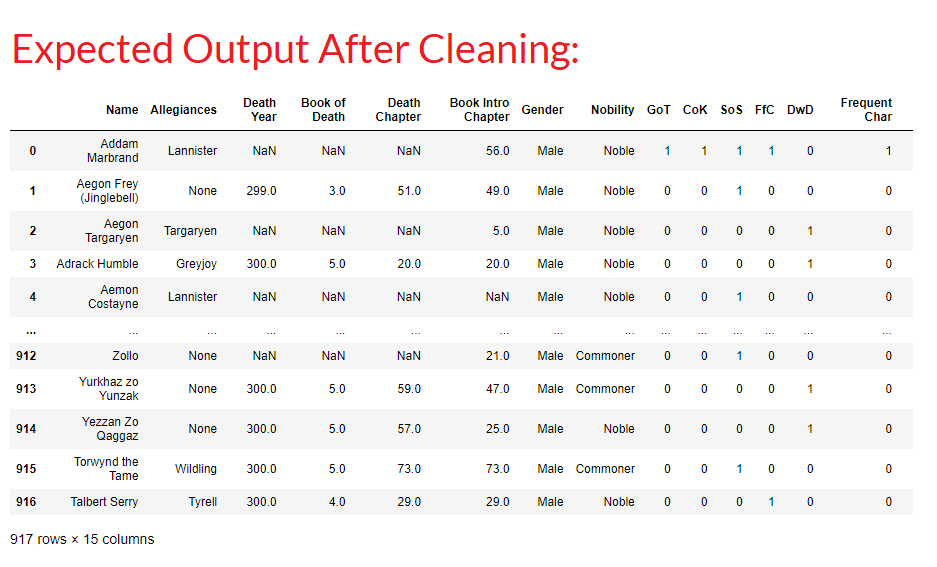

# Univariate Analysis

/var/folders/mh/z_9pm2ls1g10c7nbqtt74cdm0000gn/T/ipykernel_50745/3266211442.py:9: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  allegiances = [allegiance for allegiance, df in a]


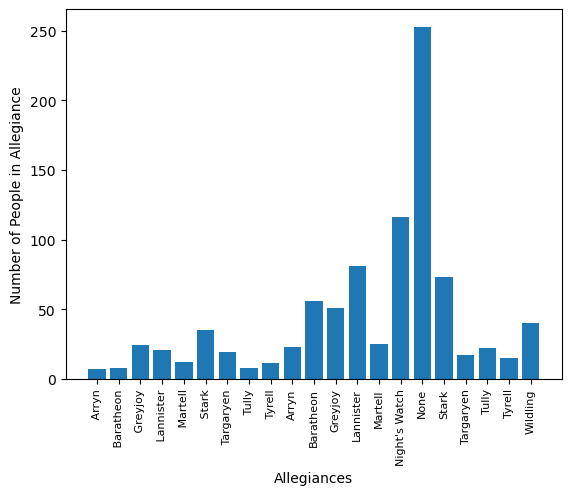

In [51]:
# 1. How big are each of the different allegiances? Create a bar chart for this. 
# (Make sure the axis labels are readable --> can make the axis labels vertical or diagonal) **[10pts]**

import matplotlib.pyplot as plt

a = got.groupby(['Allegiances'])
a_size = got.groupby(['Allegiances']).count()['Name']

allegiances = [allegiance for allegiance, df in a]

plt.bar(allegiances, a_size)
plt.ylabel('Number of People in Allegiance')
plt.xlabel('Allegiances')
plt.xticks(allegiances, rotation = 'vertical', size = 8)
plt.show()

/var/folders/mh/z_9pm2ls1g10c7nbqtt74cdm0000gn/T/ipykernel_50745/1634347394.py:7: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  deathyears = [dy for dy, df in deathyear]


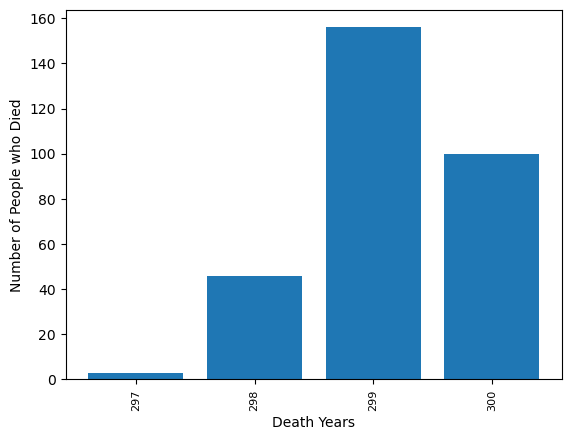

In [66]:
# 2. What year saw the most character deaths? Create a bar chart for this. 
# (Make sure the x-axis labels are only contain the years present in the Death Year column) **[10pts]**

deathyear = got.groupby(['Death Year'])
dy_size = got.groupby(['Death Year']).count()['Name']

deathyears = [dy for dy, df in deathyear]

plt.bar(deathyears, dy_size)
plt.ylabel('Number of People who Died')
plt.xlabel('Death Years')
plt.xticks(deathyears, rotation = 'vertical', size = 8)
plt.show()

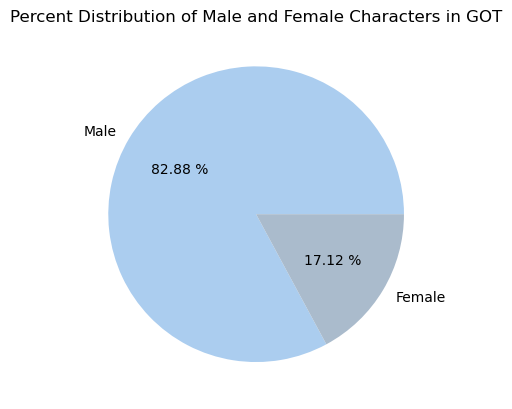

In [53]:
# 3. Create a pie chart to show the percentage distribution of Male and Female characters. **[5pts]**

Male = got.loc[got['Gender'] == 'Male'].count()[0]

Female = got.loc[got['Gender'] == 'Female'].count()[0]

labels = ['Male', 'Female']
colors = ['#abcdef', '#aabbcc']

plt.pie([Male, Female], labels = labels, colors = colors, autopct = '%.2f %%')
plt.title('Percent Distribution of Male and Female Characters in GOT')

plt.show()



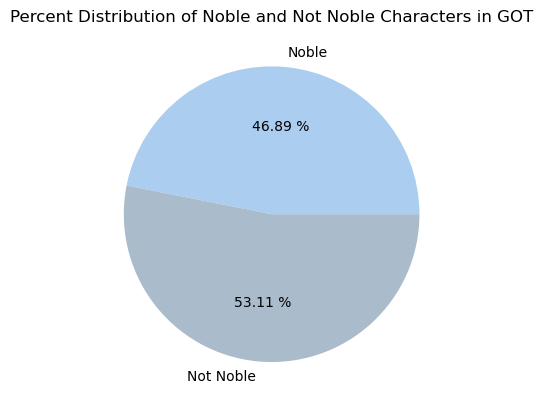

In [54]:
# 4. Create a pie chart to show the percentage distribution of Noble characters. **[5pts]**

Noble = got.loc[got['Nobility'] == 'Noble'].count()[0]

Notnoble = got.loc[got['Nobility'] == 'Commoner'].count()[0]

labels = ['Noble', 'Not Noble']
colors = ['#abcdef', '#aabbcc']

plt.pie([Noble, Notnoble], labels = labels, colors = colors, autopct = '%.2f %%')
plt.title('Percent Distribution of Noble and Not Noble Characters in GOT')

plt.show()


# Multivariate Analysis

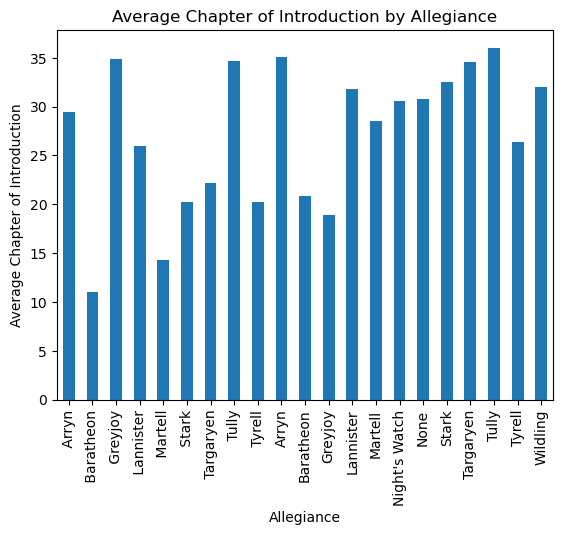

In [82]:
# 1. What's the average chapter where characters were introduced, for each Allegiance? Create a bar chart for this. **[10pts]**

average_chapter = got.groupby('Allegiances')['Book Intro Chapter'].mean()

average_chapter.plot(kind='bar')
plt.xlabel('Allegiance')
plt.ylabel('Average Chapter of Introduction')
plt.title('Average Chapter of Introduction by Allegiance')
plt.show()


/var/folders/mh/z_9pm2ls1g10c7nbqtt74cdm0000gn/T/ipykernel_50745/2051396283.py:14: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  allegiances = [allegiance for allegiance, df in a]


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (21,) and arg 1 with shape (0, 16).

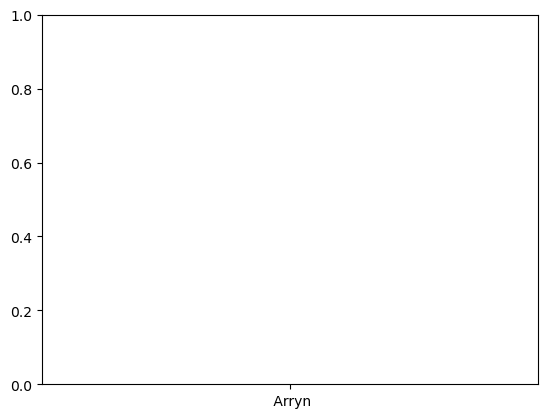

In [114]:
# 2. How many frequent AND noble characters are there in every Allegiance? (Has to be both frequent and noble) 
# Create a bar chart for this. **[10pts]**

noble_characters = got[got['Nobility'] == True]

frequent_noble_characters = noble_characters.groupby('Allegiances')['Frequent Char'].idxmax()
frequent_noble_characters = noble_characters.loc[frequent_noble_characters]

frequent_noble_characters = frequent_noble_characters[frequent_noble_characters['Frequent Char'] >= 3]
frequent_noble_characters

a = got.groupby(['Allegiances'])

allegiances = [allegiance for allegiance, df in a]


plt.bar(allegiances, frequent_noble_characters)

plt.xticks(bins)
plt.ylabel("Frequency")
plt.xlabel("Character")
plt.title("Frequent and Noble Characters per Allegiance", fontdict={'fontweight':'bold', 'fontsize':'12'})
plt.show()

In [ ]:
def check_nobility_freak(x, y):
    count = 0 
    if x == 'Noble' and y >= 1:
        count += 1
    else:
        count = count
        
    return count

noble_freak = got[['Nobility', 'Frequent Char']].apply(lambda x: check_nobility_freak(x,y))
noble_freak

noble_count = got.loc[got['Nobility'] == 'Noble']
freqchar_count = got.loc[got['Frequent Char'] >= 1]

noble_count
freqchar_count

In [98]:
# 3. How many noble characters from each Allegiance die per year? (Has to be both frequent and noble) **[10pts]**

noble_frequent_characters = got[(got['Nobility'] == True) & (got['Frequent Char'] >= 3)]

noble_characters_per_year = noble_frequent_characters.groupby(['Allegiances', 'Death Year']).size()

print(noble_characters_per_year)

got.loc[got['Nobility'] == 'Noble']
got.loc[got['Death Year'] != 'NaN']

Series([], dtype: int64)


,Name,Allegiances,Death Year,Book of Death,Death Chapter,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD,frequent_character,Frequent Char
0,Addam Marbrand,Lannister,NaN,NaN,NaN,56.0,Male,Noble,1,1,1,1,0,1,4
1,Aegon Frey (Jinglebell),None,299.0,3.0,51.0,49.0,Male,Noble,0,0,1,0,0,1,1
2,Aegon Targaryen,Targaryen,NaN,NaN,NaN,5.0,Male,Noble,0,0,0,0,1,1,1
3,Adrack Humble,Greyjoy,300.0,5.0,20.0,20.0,Male,Noble,0,0,0,0,1,1,1
4,Aemon Costayne,Lannister,NaN,NaN,NaN,NaN,Male,Noble,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912,Zollo,None,NaN,NaN,NaN,21.0,Male,Commoner,0,0,1,0,0,1,1
913,Yurkhaz zo Yunzak,None,300.0,5.0,59.0,47.0,Male,Commoner,0,0,0,0,1,1,1
914,Yezzan Zo Qaggaz,None,300.0,5.0,57.0,25.0,Male,Noble,0,0,0,0,1,1,1
915,Torwynd the Tame,Wildling,300.0,5.0,73.0,73.0,Male,Commoner,0,0,1,0,0,1,1


In [87]:
got.loc[got['Death Chapter'] != 'NaN']

,Name,Allegiances,Death Year,Book of Death,Death Chapter,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD,frequent_character,Frequent Char
0,Addam Marbrand,Lannister,NaN,NaN,NaN,56.0,Male,Noble,1,1,1,1,0,1,4.0
1,Aegon Frey (Jinglebell),None,299.0,3.0,51.0,49.0,Male,Noble,0,0,1,0,0,1,2.0
2,Aegon Targaryen,Targaryen,NaN,NaN,NaN,5.0,Male,Noble,0,0,0,0,1,1,2.0
3,Adrack Humble,Greyjoy,300.0,5.0,20.0,20.0,Male,Noble,0,0,0,0,1,1,2.0
4,Aemon Costayne,Lannister,NaN,NaN,NaN,NaN,Male,Noble,0,0,1,0,0,1,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912,Zollo,None,NaN,NaN,NaN,21.0,Male,Commoner,0,0,1,0,0,1,2.0
913,Yurkhaz zo Yunzak,None,300.0,5.0,59.0,47.0,Male,Commoner,0,0,0,0,1,1,2.0
914,Yezzan Zo Qaggaz,None,300.0,5.0,57.0,25.0,Male,Noble,0,0,0,0,1,1,2.0
915,Torwynd the Tame,Wildling,300.0,5.0,73.0,73.0,Male,Commoner,0,0,1,0,0,1,2.0


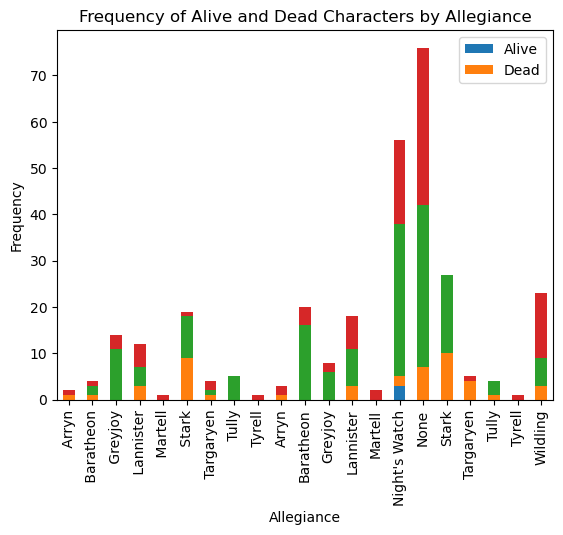

In [95]:
# 4. Create a stacked bar chart for the frequency of Alive and Dead characters, based on their Allegiance. **[20pts]**

frequency = got.groupby(['Allegiances', 'Death Year']).size().unstack()

frequency.plot(kind='bar', stacked=True)
plt.xlabel('Allegiance')
plt.ylabel('Frequency')

plt.title('Frequency of Alive and Dead Characters by Allegiance')
plt.legend(['Alive', 'Dead'])

plt.show()

# Bonus

1. Identify the last book where each character appeared in. Display this in a new column called "Final Appearance"


2. "Valar morghulis"

In [103]:
# 1. 

got['Final Appearance'] = got['Book of Death']

got.head(20)

,Name,Allegiances,Death Year,Book of Death,Death Chapter,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD,frequent_character,Frequent Char,Final Appearance
0,Addam Marbrand,Lannister,NaN,NaN,NaN,56.0,Male,Noble,1,1,1,1,0,1,4,NaN
1,Aegon Frey (Jinglebell),None,299.0,3.0,51.0,49.0,Male,Noble,0,0,1,0,0,1,1,3.0
2,Aegon Targaryen,Targaryen,NaN,NaN,NaN,5.0,Male,Noble,0,0,0,0,1,1,1,NaN
3,Adrack Humble,Greyjoy,300.0,5.0,20.0,20.0,Male,Noble,0,0,0,0,1,1,1,5.0
4,Aemon Costayne,Lannister,NaN,NaN,NaN,NaN,Male,Noble,0,0,1,0,0,1,1,NaN
5,Aemon Estermont,Baratheon,NaN,NaN,NaN,NaN,Male,Noble,0,1,1,0,0,1,2,NaN
6,Aemon Targaryen (son of Maekar I),Night's Watch,300.0,4.0,35.0,21.0,Male,Noble,1,0,1,1,0,1,3,4.0
7,Aenys Frey,None,300.0,5.0,NaN,59.0,Female,Noble,1,1,1,0,1,1,4,5.0
8,Aeron Greyjoy,Greyjoy,NaN,NaN,NaN,11.0,Male,Noble,0,1,0,1,0,1,2,NaN
9,Aethan,Night's Watch,NaN,NaN,NaN,0.0,Male,Commoner,0,0,1,0,0,1,1,NaN


In [ ]:
# 2. This means "All Men Must Die"